## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## 2. Apply Feature scaling

This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3. Training the Logistic Regression model

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 4a. Tabulate decision boundary

There will be 2 variables we are calling - `x1` and `x2`. 

1. `np.arrange()` takes iterative steps sizes to start from a point to an end. Setting an offset of `10` (or `1000` for `x2`) allows marginal space from the start to the end point. For performance, a larger step size is taken. This would result in blocks of delta X & Y iteratively. To understand [`np.meshgrid()` click this](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy).
2. Using the values of `x1` and `x2`, we can predict the z values for each block to determine if it results in 1 or 0. This should give us the decision boundary (note that `ravel()` flattens the `x1` and `x2` list).

In [4]:
x_train_inverse = sc.inverse_transform(x_train)
x_test_inverse = sc.inverse_transform(x_test)
y_prediction = model.predict(x_test)

# Imagine calculus riemann sum delta
x1_delta = 0.5
x2_delta = 5

x1_margin = 10
x2_margin = 1000

x1, x2 = np.meshgrid(
    np.arange(start=x_train_inverse[:, 0].min() - x1_margin, stop=x_train_inverse[:, 0].max() + x1_margin, step=x1_delta),
    np.arange(start=x_train_inverse[:, 1].min() - x2_margin, stop=x_train_inverse[:, 1].max() + x2_margin, step=x2_delta)
)

z = model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)

## 4b. Display graph and details

The dots represents the entire data set and their actual predicted class. Green represents class `1` and red represents class `0`. The shaded areas of green and red are predicted areas that determines the data point classes. For test data, they are either circled with yellow (predicted `0`) and cyan (predicted `1`).

There is also the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to get a sense of the accuracy  for the test data.

Eqn = [b0=-0.9523223978958485] + [b1=2.0766937696593093] * x1 + [b2=1.1102990998879991] * x2
Penalty=l2, lambda=1.0 

                Pred. Class 0  Pred. Class 1
Actual Class 0             65              3
Actual Class 1              8             24 

Accuracy score: 89.0%


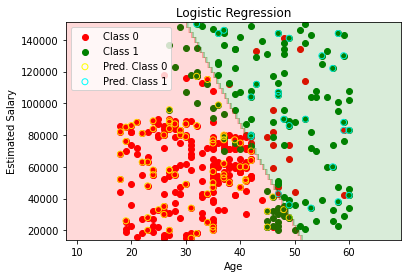

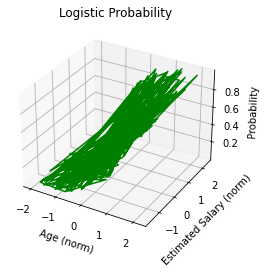

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score
from utils import split_into_classes

x_0, x_1 = split_into_classes(x, y)
x_test_0, x_test_1 = split_into_classes(x_test_inverse, y_prediction)

cm = confusion_matrix(y_test, y_prediction)

print(f'Eqn = [b0={model.intercept_[0]}] + [b1={model.coef_[0][0]}] * x1 + [b2={model.coef_[0][1]}] * x2')
print(f'Penalty={model.get_params()["penalty"]}, lambda={1 / model.get_params()["C"]} \n')

print(pd.DataFrame(cm, columns=['Pred. Class 0', 'Pred. Class 1'], index=['Actual Class 0', 'Actual Class 1']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_prediction) * 100}%')

plt.scatter(x_0['x'], x_0['y'], color='red', label='Class 0')
plt.scatter(x_1['x'], x_1['y'], color='green', label='Class 1')

plt.scatter(x_test_0['x'], x_test_0['y'], facecolors='none', edgecolors='yellow', label='Pred. Class 0')
plt.scatter(x_test_1['x'], x_test_1['y'], facecolors='none', edgecolors='cyan', label='Pred. Class 1')

plt.contourf(x1, x2, z, alpha = 0.15, cmap=ListedColormap(('red', 'green')))

plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# >= 0.5 for 1 and < 0.5 for 0
plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Logistic Probability')
ax.set_xlabel('Age (norm)', linespacing=3.2)
ax.set_ylabel('Estimated Salary (norm)', linespacing=3.1)
ax.set_zlabel('Probability')
ax.plot3D(x_train[:,0], x_train[:,1], model.predict_proba(x_train)[:,1], 'green')